### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### READING FILE PATH

In [2]:
df=pd.read_csv(r"C:\Users\DELL\Downloads\business.retailsales.csv")

In [3]:
df.head()

,Product Type,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales
0,Art & Sculpture,34,14935.0,-594.00,-1609.0,12732.00
1,Basket,13,3744.0,-316.80,0.0,3427.20
2,Basket,12,3825.0,-201.60,-288.0,3335.40
3,Basket,17,3035.0,-63.25,0.0,2971.75
4,Art & Sculpture,47,2696.8,-44.16,0.0,2652.64


In [4]:
df.shape

(1775, 6)

In [5]:
df.dtypes

Product Type        object
Net Quantity         int64
Gross Sales        float64
Discounts          float64
Returns            float64
Total Net Sales    float64
dtype: object

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1775 entries, 0 to 1774
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product Type     1767 non-null   object 
 1   Net Quantity     1775 non-null   int64  
 2   Gross Sales      1775 non-null   float64
 3   Discounts        1775 non-null   float64
 4   Returns          1775 non-null   float64
 5   Total Net Sales  1775 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 83.3+ KB


In [6]:
df.duplicated().sum()

512

### SPLITIND DATA

In [20]:
num_cols=df.select_dtypes(include='number')
cat_cols=df.select_dtypes(include='object')

In [21]:
num_cols.isnull().sum()

Net Quantity       0
Gross Sales        0
Discounts          0
Returns            0
Total Net Sales    0
dtype: int64

### CHECKING OUTLIERS

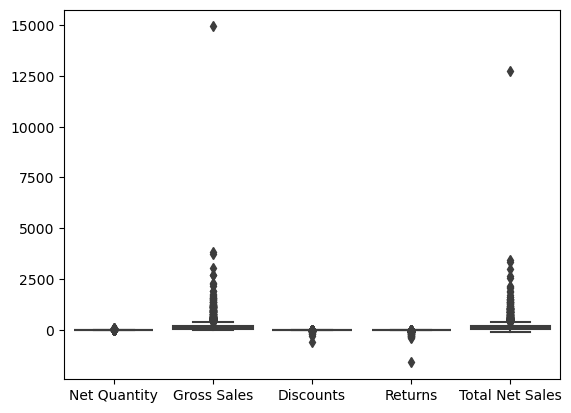

In [22]:
sns.boxplot(num_cols)
plt.show()

### REMOVING OUTLIERS

In [26]:
def wisker(col):
   q1=num_cols[col].quantile(0.25)
   q3=num_cols[col].quantile(0.75)
   iqr=q3-q1
   lower=q1-(1.5*iqr)
   upper=q3+(1.5*iqr)
   return lower,upper

In [27]:
for i in num_cols:
  lower,upper=wisker(i)
  num_cols[i]=np.where(num_cols[i]<lower,lower,num_cols[i])   
  num_cols[i]=np.where(num_cols[i]>upper,upper,num_cols[i])

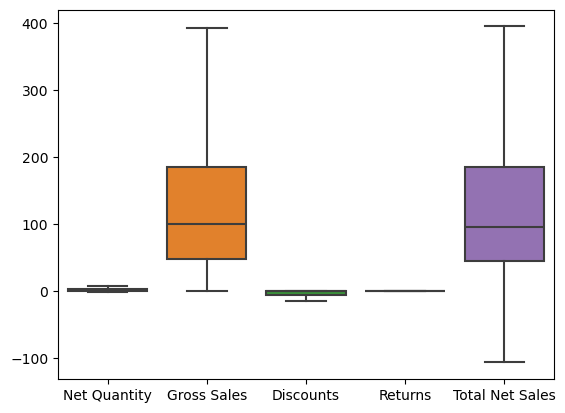

In [28]:
sns.boxplot(num_cols)
plt.show()

### SCALING

In [29]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
num_cols_scaled=ss.fit_transform(num_cols)

In [30]:
num_cols_scaled=pd.DataFrame(num_cols_scaled,columns=num_cols.columns)

In [31]:
num_cols_scaled.isnull().sum()

Net Quantity       0
Gross Sales        0
Discounts          0
Returns            0
Total Net Sales    0
dtype: int64

In [32]:
cat_cols.isnull().sum()

Product Type    8
dtype: int64

In [19]:
cat_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1775 entries, 0 to 1774
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product Type  1767 non-null   object
dtypes: object(1)
memory usage: 14.0+ KB


### FILLING NULL VALUES

In [35]:
cat_cols['Product Type']=cat_cols['Product Type'].fillna(cat_cols['Product Type'].mode()[0],inplace=True)

### ENCODING

In [36]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [37]:
cat_cols_encoded=cat_cols.apply(le.fit_transform)

In [38]:
cat_cols_encoded.isnull().sum()

Product Type    0
dtype: int64

### CONCATING NUM,CAT COLUMNS

In [40]:
df_final=pd.concat([num_cols_scaled,cat_cols_encoded],axis=1)

In [41]:
df_final.head()

,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales,Product Type
0,2.307456,2.130503,-2.079792,0.0,2.215204,0
1,2.307456,2.130503,-2.079792,0.0,2.215204,0
2,2.307456,2.130503,-2.079792,0.0,2.215204,0
3,2.307456,2.130503,-2.079792,0.0,2.215204,0
4,2.307456,2.130503,-2.079792,0.0,2.215204,0


In [43]:
X=df_final.drop('Total Net Sales',axis=1)
y=df_final['Total Net Sales']

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [47]:
X_train.shape,X_test.shape

((1242, 5), (533, 5))

In [48]:
y_train.shape,y_test.shape

((1242,), (533,))

In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model=Sequential([
    Dense(80,activation="relu",input_dim=5),
    Dense(50,activation="relu"),
    Dense(1,activation='linear')])

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### COMPILING THE MODEL

In [74]:
model.compile(optimizer='adam',loss='mse')

### TRAINING THE MODEL

In [75]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3299
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0273 
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0382
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0251 
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0428 
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0404 
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0284
Epoch 8/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0286
Epoch 9/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0334
Epoch 10/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0302
Epoch 11/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0176
Epoch 12/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0214 
Epoch 13/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0220
Epoch 14/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0245
Epoch 15/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0237

### EVALUATING THE MODEL

In [76]:
loss=model.evaluate(X_test,y_test)
print(f'Test loss: {loss}')

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0101      
Test loss: 0.011228608898818493


### PREDICTING THE MODEL

In [77]:
predictions=model.predict(X_test)
predictions[:10]

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[ 2.2023256 ],
       [-0.59044236],
       [-0.50996083],
       [ 0.7119977 ],
       [ 0.1296873 ],
       [-0.5638286 ],
       [-0.16649434],
       [ 0.78483474],
       [ 0.32426748],
       [ 0.586308  ]], dtype=float32)

In [78]:
from sklearn.metrics import r2_score

### ACCURACY CHECK

In [79]:
score=r2_score(y_test,predictions)*100
f'TESTING SCORE : {score}'

'TESTING SCORE : 98.77095065990915'

In [81]:
prediction1=model.predict(X_train)
score1=r2_score(prediction1,y_train)*100
f'Training SCORE : {score1}'

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step


'Training SCORE : 99.001821051968'